**Import the necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
import warnings 
warnings.filterwarnings('ignore')

**Read the Data**

In [2]:
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


**Shape of the data**

In [3]:
df.shape

(1030, 9)

**check the columns**

In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

## Data Preprocessing

1. check the imbalance in the data or misptelt word and remove unwanted whitespaces

In [5]:
for i in df.columns:
    df.rename(columns = {i : i.strip()},inplace =True)
    
    

In [6]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals)'],
      dtype='object')

**check the info of the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

**check for null values, missing values**
1. %  of null values present in the data

In [8]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

**Check for duplicates**

if any , do the necessary treatments

In [9]:
df.duplicated().value_counts()

False    1005
True       25
dtype: int64

In [10]:
df[df.duplicated()]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().value_counts()

False    1005
dtype: int64

In [13]:
df['Age (day)'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

**Univariate Analysis**

*Numerical Plots*

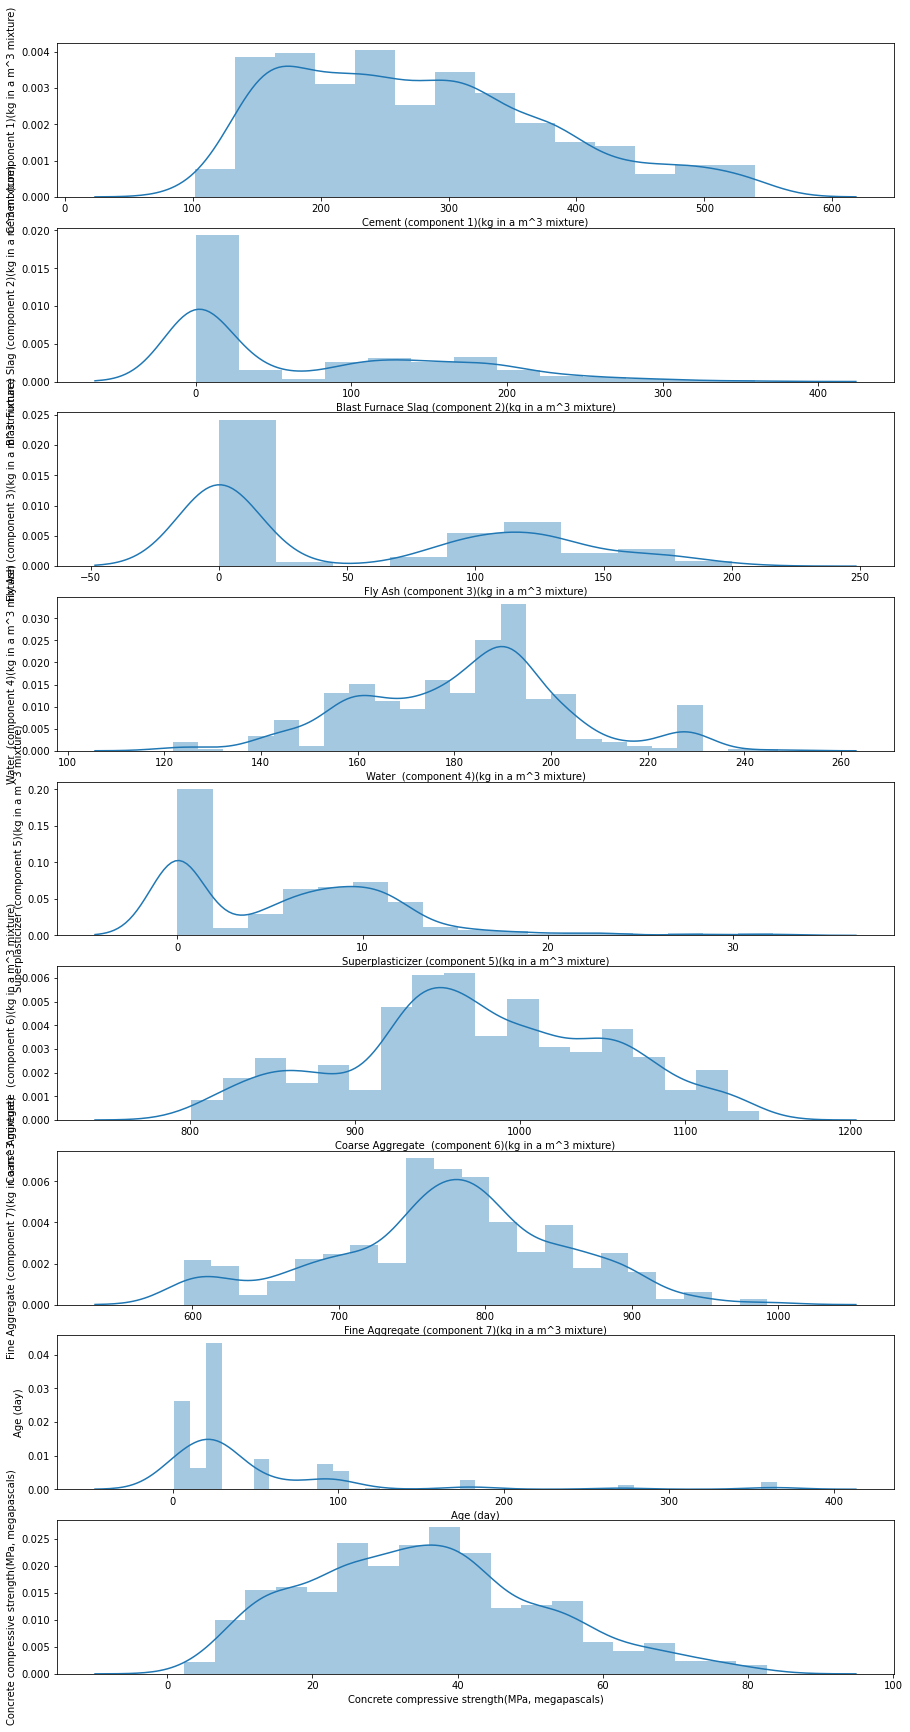

The number of plots are :  9


In [14]:
plt.figure(figsize= (15,30))
for i,j in enumerate(df.columns,1):
    plt.subplot(len(df.columns),1,i)
    sns.distplot(df[j])
    plt.ylabel(j)
plt.show()
print('The number of plots are : ', i)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

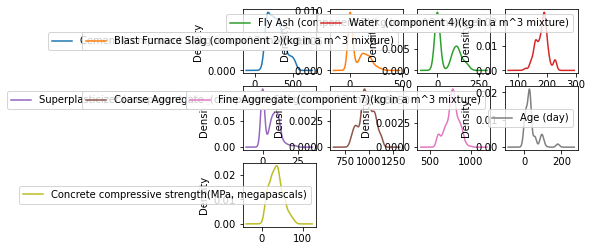

In [69]:
df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)

array([[<AxesSubplot:title={'center':'Cement (component 1)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<AxesSubplot:title={'center':'Water  (component 4)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<AxesSubplot:title={'center':'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Age (day)'}>,
        <AxesSubplot:title={'center':'Concrete compressive strength(MPa, megapascals)'}>]],
      dtype=object)

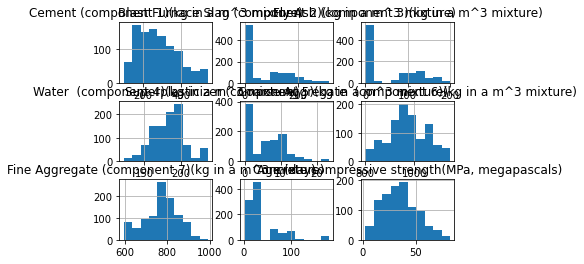

In [68]:
df.hist()

*Categorical Plots*

**Bivariate Analysis**

*Numerical plots*

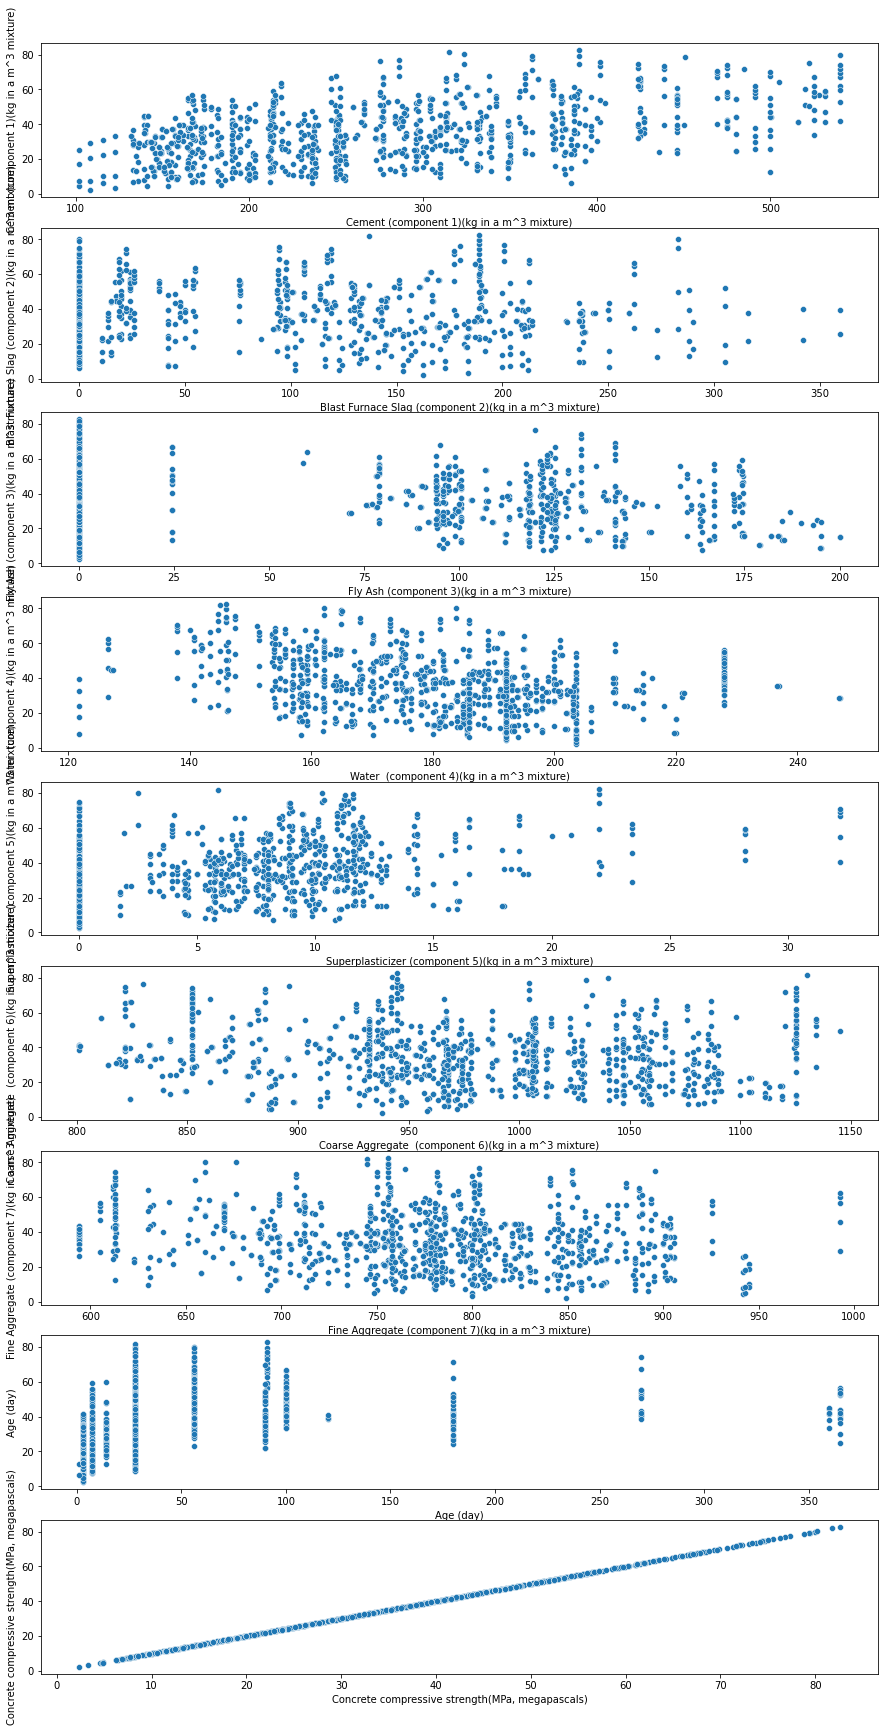

The number of plots are :  9


In [15]:
plt.figure(figsize= (15,30))
for i,j in enumerate(df.columns,1):
    plt.subplot(len(df.columns),1,i)
    sns.scatterplot(df[j], df['Concrete compressive strength(MPa, megapascals)'])
    plt.ylabel(j)
plt.show()
print('The number of plots are : ', i)

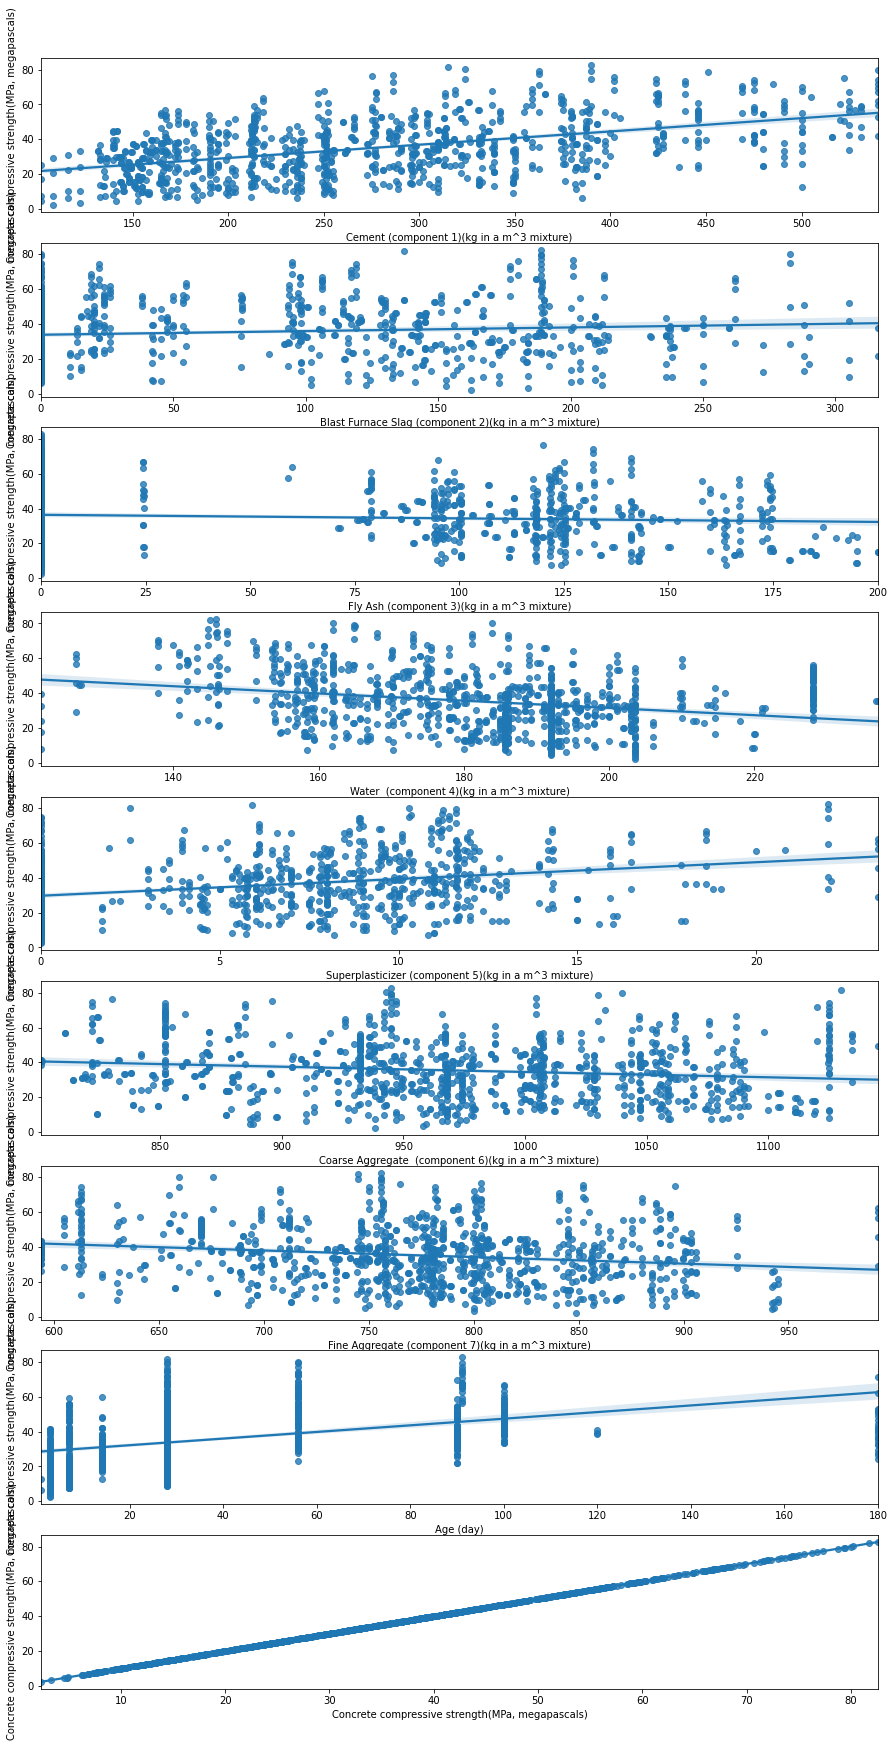

The number of plots are :  9


In [41]:
plt.figure(figsize= (15,30))
for i,j in enumerate(df.columns,1):
    plt.subplot(len(df.columns),1,i)
    sns.regplot(df[j], df['Concrete compressive strength(MPa, megapascals)'])
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.show()
print('The number of plots are : ', i)

*Categorical Plots*

**Multivariate Analysis**

*Numerical Plots*

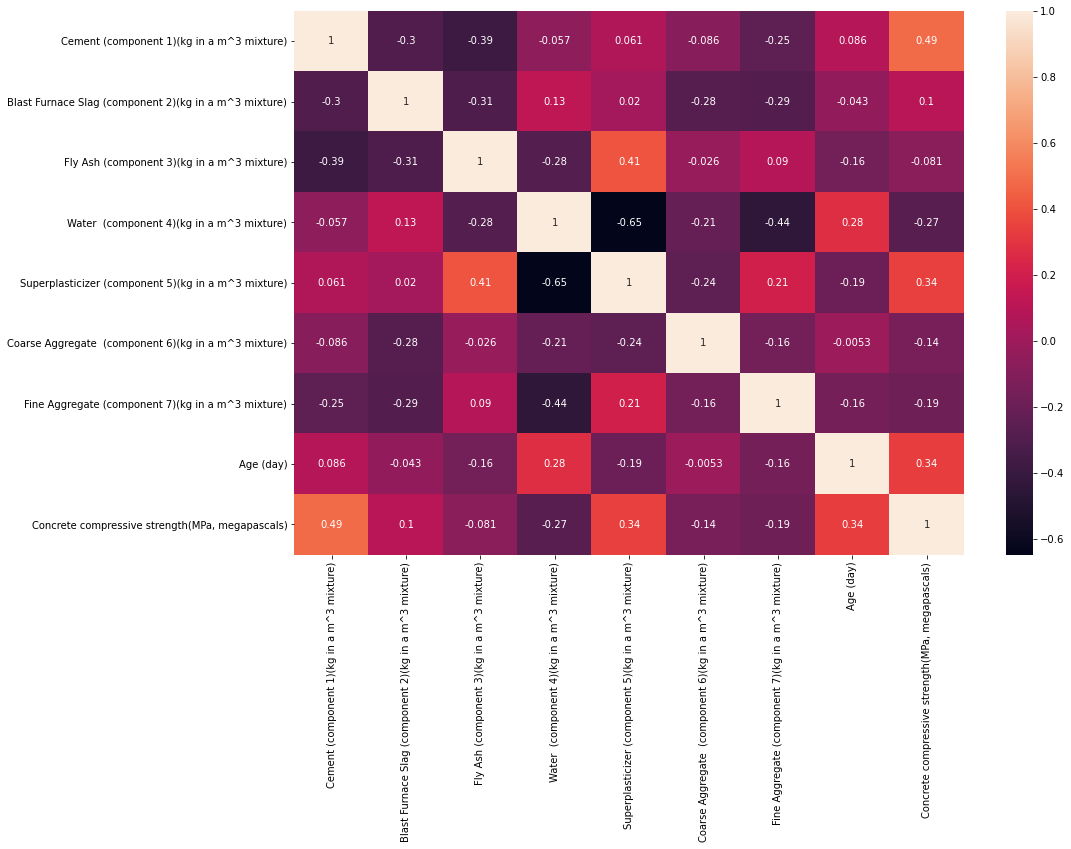

In [17]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [18]:
df.corr().iloc[:,-1]

Cement (component 1)(kg in a m^3 mixture)                0.488283
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.103370
Fly Ash (component 3)(kg in a m^3 mixture)              -0.080648
Water  (component 4)(kg in a m^3 mixture)               -0.269606
Superplasticizer (component 5)(kg in a m^3 mixture)      0.344225
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.144710
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.186457
Age (day)                                                0.337371
Concrete compressive strength(MPa, megapascals)          1.000000
Name: Concrete compressive strength(MPa, megapascals), dtype: float64

*Categorical Plots*

In [42]:
# HERE fly ash is not that much correalted with strength

**Outlier Detection**

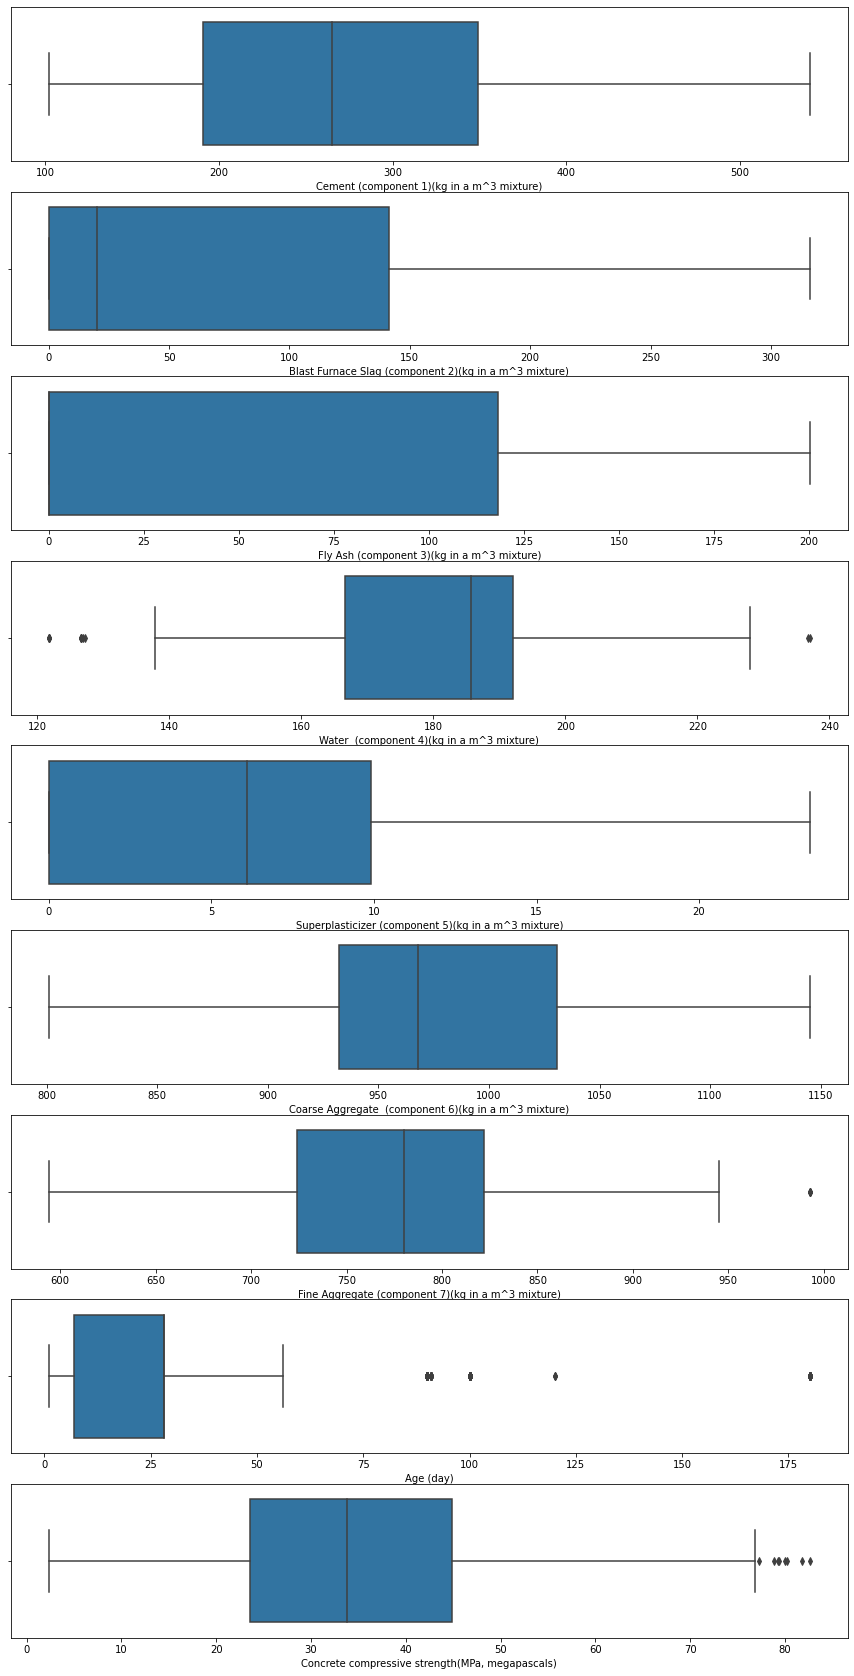

In [64]:
plt.figure(figsize = (15,30))
for i,cols in enumerate(df.columns,1):
    plt.subplot(len(df.columns),1,i)
    sns.boxplot(df[cols])
    plt.xlabel(cols)
plt.show()

**Outlier Treatment**

1. Remove outliers

2. Impute 

3. IQR treatment

4. Transformation

In [20]:
df['Concrete compressive strength(MPa, megapascals)'].mean()


35.25027287623583

In [21]:
df[df > (df.mean() + 3*df.std())].count()

Cement (component 1)(kg in a m^3 mixture)                 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     4
Fly Ash (component 3)(kg in a m^3 mixture)                0
Water  (component 4)(kg in a m^3 mixture)                 2
Superplasticizer (component 5)(kg in a m^3 mixture)      10
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0
Fine Aggregate (component 7)(kg in a m^3 mixture)         0
Age (day)                                                33
Concrete compressive strength(MPa, megapascals)           0
dtype: int64

In [22]:
df[df > (df.mean() + 3*df.std())]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN
...,...,...,...,...,...,...,...,...,...
1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.mean() + 3*df.std()

Cement (component 1)(kg in a m^3 mixture)                 591.664063
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     330.554800
Fly Ash (component 3)(kg in a m^3 mixture)                248.157420
Water  (component 4)(kg in a m^3 mixture)                 246.096597
Superplasticizer (component 5)(kg in a m^3 mixture)        23.790324
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1207.115069
Fine Aggregate (component 7)(kg in a m^3 mixture)        1013.706170
Age (day)                                                 237.060791
Concrete compressive strength(MPa, megapascals)            84.104696
dtype: float64

In [24]:
df[df > (df.mean() - 3*df.std())].count()

Cement (component 1)(kg in a m^3 mixture)                1005
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1005
Fly Ash (component 3)(kg in a m^3 mixture)               1005
Water  (component 4)(kg in a m^3 mixture)                1005
Superplasticizer (component 5)(kg in a m^3 mixture)      1005
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1005
Fine Aggregate (component 7)(kg in a m^3 mixture)        1005
Age (day)                                                1005
Concrete compressive strength(MPa, megapascals)          1005
dtype: int64

In [25]:
df.shape

(1005, 9)

In [26]:
df[df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] > df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].mean()+ 3*df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].std()]['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']

553    359.4
559    359.4
571    342.1
584    342.1
Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), dtype: float64

**Impute the outliers which are above mu + 3*sigma with median**

In [27]:
for i in df.columns:
    df[i] = np.where(df[i] > df[i].mean()+3*(df[i].std()),np.median(df[i]), df[i])

In [28]:
df[df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] > df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].mean()+ 3*df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].std()]['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']

Series([], Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), dtype: float64)

In [29]:
#ex df["Age"] = df["Age"].mask(df["Age"] >75, median) othe method

In [30]:
df[df > (df.mean() + 3*df.std())].count()

Cement (component 1)(kg in a m^3 mixture)                 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0
Fly Ash (component 3)(kg in a m^3 mixture)                0
Water  (component 4)(kg in a m^3 mixture)                 0
Superplasticizer (component 5)(kg in a m^3 mixture)      12
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0
Fine Aggregate (component 7)(kg in a m^3 mixture)         0
Age (day)                                                26
Concrete compressive strength(MPa, megapascals)           0
dtype: int64

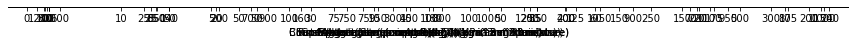

In [65]:
plt.figure(figsize= (15,0))
for i,cols in enumerate(df.columns, 1):
    
    plt.subplot(len(df.columns),1,i)
    sns.boxplot(df[cols])
    plt.xlabel(cols)
plt.show()
    

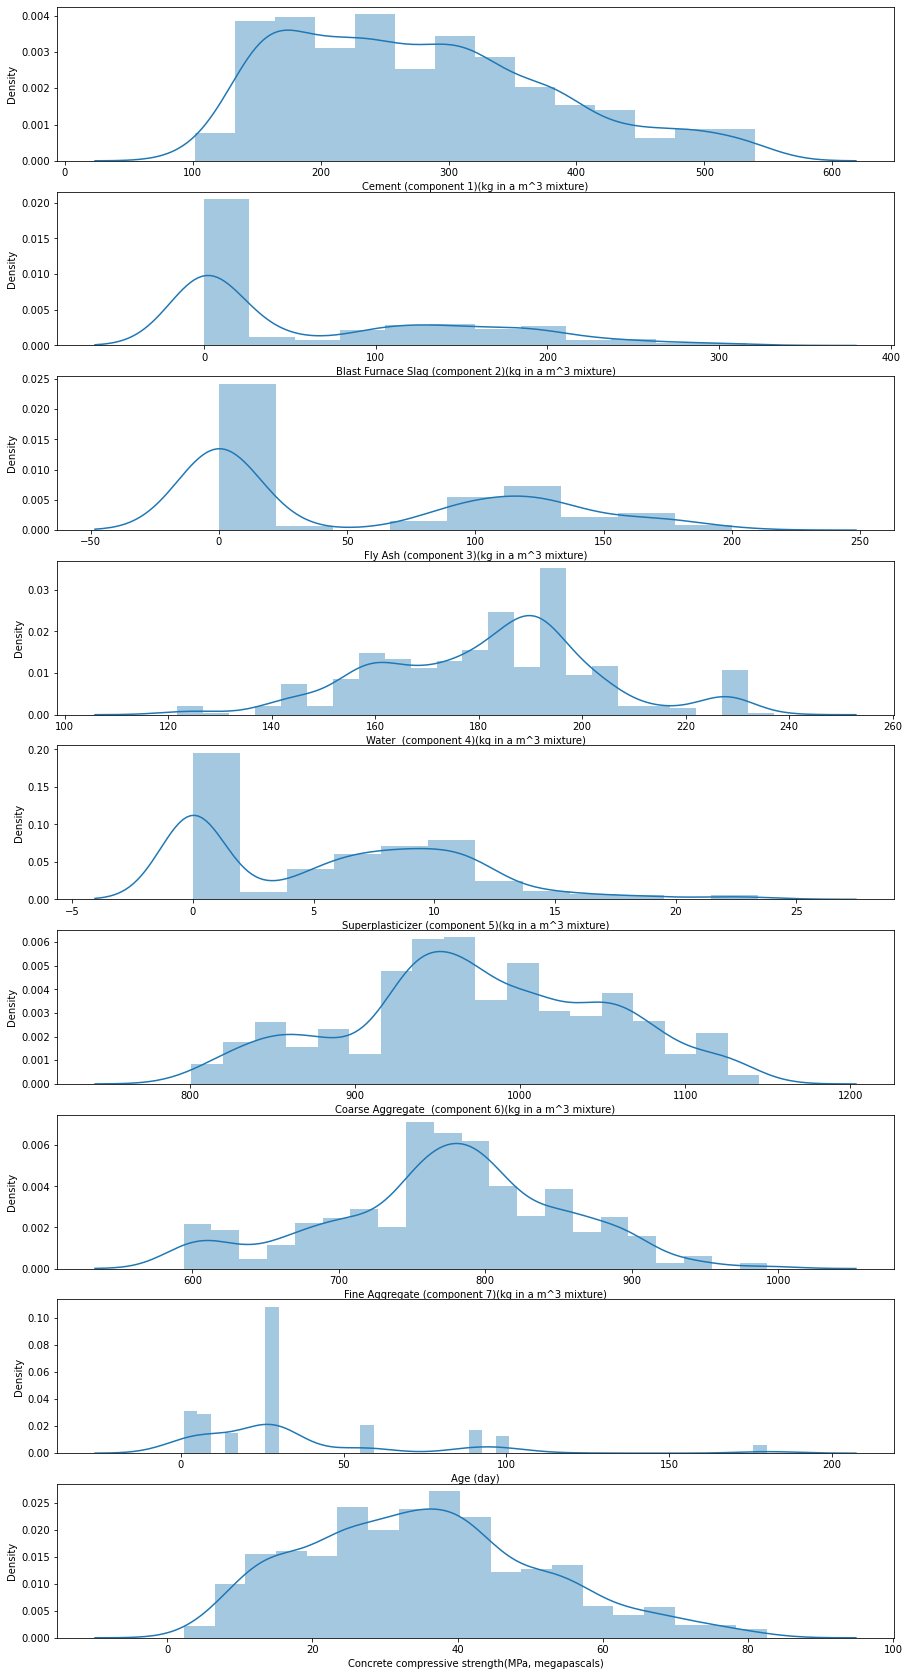

The number of plots are :  9


In [66]:
plt.figure(figsize= (15,30))
for i,j in enumerate(df.columns,1):
    plt.subplot(len(df.columns),1,i)
    sns.distplot(df[j])
    
plt.show()
print('The number of plots are : ', i)

In [33]:
df.skew()

Cement (component 1)(kg in a m^3 mixture)                0.564997
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.811784
Fly Ash (component 3)(kg in a m^3 mixture)               0.497324
Water  (component 4)(kg in a m^3 mixture)               -0.005238
Superplasticizer (component 5)(kg in a m^3 mixture)      0.514240
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.065242
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.252323
Age (day)                                                2.013181
Concrete compressive strength(MPa, megapascals)          0.395653
dtype: float64

In [34]:
df.mean()

Cement (component 1)(kg in a m^3 mixture)                278.629055
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     70.726716
Fly Ash (component 3)(kg in a m^3 mixture)                55.535075
Water  (component 4)(kg in a m^3 mixture)                181.952488
Superplasticizer (component 5)(kg in a m^3 mixture)        5.791846
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     974.376468
Fine Aggregate (component 7)(kg in a m^3 mixture)        772.686617
Age (day)                                                 36.049751
Concrete compressive strength(MPa, megapascals)           35.250273
dtype: float64

#EX

df["Age"] = np.where(df["Age"] >75, median,df['Age'])

df["Age"] = df["Age"].mask(df["Age"] >75, median)

In [35]:
s =' Teja ravi '

In [36]:
s.strip()

'Teja ravi'

In [37]:
s.lstrip()

'Teja ravi '

In [38]:
s.rstrip()

' Teja ravi'

In [39]:
s =' Teja ravi '
s.strip('hi')

' Teja ravi '